<a href="https://colab.research.google.com/github/KevinrealG/Procesos_estocasticos/blob/main/1_Cadenas_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Explicación del Código


 Explicación del Código
Este script simula una Cadena de Markov para modelar el clima, usando una matriz de transición y simulando su evolución en el tiempo.

# 1️⃣ Importación de librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#✅ numpy: Se usa para manejar la matriz de transición y las elecciones probabilísticas.
#✅ matplotlib.pyplot: Se usa para graficar la evolución de los estados del clima en el tiempo.

# 2️⃣ Definir los estados de la Cadena de Markov



In [2]:
estados = ["Soleado", "Lluvioso", "Nublado"]


# 3️⃣ Definir la Matriz de Transición


In [3]:
P = np.array([
    [0.6, 0.3, 0.1],  # Probabilidades desde Soleado
    [0.4, 0.5, 0.1],  # Probabilidades desde Lluvioso
    [0.2, 0.3, 0.5]   # Probabilidades desde Nublado
])


In [22]:
#imprimir primera fila de P
print(P[0])
# primera columna de P
print(P[:, 0])

[0.6 0.3 0.1]
[0.6 0.4 0.2]


In [79]:
# imprimir matriz P como df con nombres
df = pd.DataFrame(P, columns=estados, index=estados)
df


,Soleado,Lluvioso,Nublado
Soleado,0.6,0.3,0.1
Lluvioso,0.4,0.5,0.1
Nublado,0.2,0.3,0.5


# 4️⃣ Función para Simular la Cadena de Markov



In [84]:
# primero calculo maticial

# definir estado Incial
estado_inicial = "Soleado"
# vector fila de estado inicial
vector_inicial = np.array([1, 0, 0])

# vector de estado 1 paso
vector_1_paso = np.dot(vector_inicial, P)
vector_1_paso


array([0.6, 0.3, 0.1])

In [ ]:
# obtener la potencia de la matriz
P_2 = np.linalg.matrix_power(P, 2)
P_2

In [40]:
# función para determinar vector estado inicial dado estado_icial
def vector_inicial(estado_inicial="Soleado", estados=estados):
    # crear un vector fila de tamaño m(numero de estados)
    vector_inicial = np.zeros(len(estados))
    # buscar indice
    indice = estados.index(estado_inicial)
    # cambiar valor a 1
    vector_inicial[indice] = 1
    return vector_inicial

estado_inicial = "Soleado"
vector_inicial(estado_inicial)

array([1., 0., 0.])

In [32]:
def simular_cadena_markov(P, estados, estado_inicial, num_pasos):
    historial = [estado_inicial]  # Guardar los estados visitados
    estado_actual = estados.index(estado_inicial)  # Convertir estado a índice

    estado_actual = estados.index(estado_inicial)  # Convertir estado a índice

    for _ in range(num_pasos):  # Iterar sobre el número de pasos
        # calcular siguiente estado y valor maximo es el proximo estado


        estado_actual = np.random.choice([0, 1, 2], p=P[estado_actual])  # Elegir nuevo estado
        historial.append(estados[estado_actual])  # Guardar en el historial

    return historial


In [46]:
def calculo_transiciones_n(P, vector_inicial, n, estados):
    """
    Calcula la distribución de probabilidad de los estados de una cadena de Markov
    después de n pasos, dado una matriz de transición P y un vector inicial.

    Args:
        P: Matriz de transición de la cadena de Markov.
        vector_inicial: Vector inicial de distribución de probabilidad.
        n: Número de pasos a simular.
        estados: Lista de nombres de los estados.

    Returns:
        Una tupla que contiene:
            - vector_actual: Vector de distribución de probabilidad después de n pasos.
            - df_historial: DataFrame con el historial de la distribución de probabilidad
                           en cada paso.
    """
    # Convertir el vector inicial a un array NumPy
    vector_inicial = np.array([vector_inicial])
    print(vector_inicial)

    # Inicializar el vector actual y el historial
    vector_actual = vector_inicial
    historial = [vector_actual[0]]  # Guardar el estado inicial en el historial

    # Iterar n veces para calcular la distribución de probabilidad en cada paso
    for _ in range(n):
        vector_actual = np.dot(vector_actual, P)  # Multiplicar por la matriz de transición
        historial.append(vector_actual[0])  # Agregar el nuevo estado al historial

    # Convertir el historial a un DataFrame de Pandas
    df_historial = pd.DataFrame(historial, columns=estados)
    # redondear
    df_historial = df_historial.round(2)
    df_historial.index.name = 'Paso'  # Nombrar la columna del índice como 'Paso'

    return vector_actual, df_historial  # Devolver el vector actual y el historial

#ejemplo
a,b=calculo_transiciones_n(P, vector_inicial("Soleado"), 10, estados)
b


[[1. 0. 0.]]


,Soleado,Lluvioso,Nublado
Paso,,,
0,1.00,0.00,0.00
1,0.60,0.30,0.10
2,0.50,0.36,0.14
3,0.47,0.37,0.16
4,0.46,0.37,0.16
5,0.46,0.37,0.16
6,0.46,0.37,0.17
7,0.46,0.37,0.17
8,0.46,0.37,0.17


In [77]:
def matriz_de_transicion_n(P, n):
    """
    Calcula la matriz de transición resultante después de n pasos, dado una matriz de transición P.
    Potencia de n

    Args:
        P: Matriz de transición de la cadena de Markov.
        n: Número de pasos a calcular.

    Returns:
        La matriz de transición resultante después de n pasos.


    """
    P_n = np.linalg.matrix_power(P, n)
    # round a 2
    P_n = np.round(P_n, 2)
    # convert a df
    P_n = pd.DataFrame(P_n, columns=estados, index=estados)
    return P_n


matriz_de_transicion_n(P, 500
                       )

,Soleado,Lluvioso,Nublado
Soleado,0.46,0.38,0.17
Lluvioso,0.46,0.38,0.17
Nublado,0.46,0.38,0.17


# 5️⃣ Configuración de la Simulación

In [47]:
estado_inicial = "Soleado"  # Cambia para probar con otro estado inicial
estado_inicial = [0, 0.5, 0.5]
num_dias = 50  # Número de días a simular

calculo_transiciones_n (P, estado_inicial, num_dias, estados)

[[0.  0.5 0.5]]


(array([[0.45833333, 0.375     , 0.16666667]]),
       Soleado  Lluvioso  Nublado
 Paso                            
 0        0.00      0.50     0.50
 1        0.30      0.40     0.30
 2        0.40      0.38     0.22
 3        0.44      0.38     0.19
 4        0.45      0.38     0.18
 5        0.45      0.38     0.17
 6        0.46      0.38     0.17
 7        0.46      0.38     0.17
 8        0.46      0.38     0.17
 9        0.46      0.38     0.17
 10       0.46      0.38     0.17
 11       0.46      0.38     0.17
 12       0.46      0.38     0.17
 13       0.46      0.38     0.17
 14       0.46      0.38     0.17
 15       0.46      0.38     0.17
 16       0.46      0.38     0.17
 17       0.46      0.38     0.17
 18       0.46      0.38     0.17
 19       0.46      0.38     0.17
 20       0.46      0.38     0.17
 21       0.46      0.38     0.17
 22       0.46      0.38     0.17
 23       0.46      0.38     0.17
 24       0.46      0.38     0.17
 25       0.46      0.38     0.17


# 6️⃣ Ejecutar la Simulación



In [7]:
resultado = simular_cadena_markov(P, estados, estado_inicial, num_dias)


In [15]:
resultado_1 = simular_cadena_markov(P, estados, estado_inicial, 1)
resultado_1

['Soleado', 'Soleado']

7️⃣ Contar la Frecuencia de Cada Estado
python
Copiar
Editar


In [8]:
conteo_estados = {estado: resultado.count(estado) for estado in estados}


✅ Crea un diccionario que cuenta cuántas veces apareció cada estado.

8️⃣ Graficar la Evolución del Clima
python
Copiar
Editar



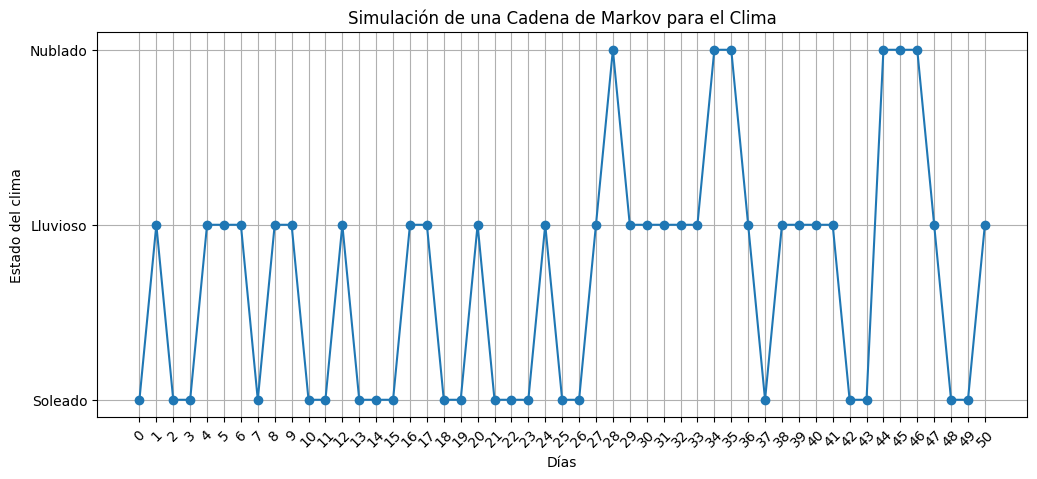

In [9]:
plt.figure(figsize=(12, 5))  # Define el tamaño de la gráfica
plt.plot(range(num_dias + 1), resultado, marker="o", linestyle="-")  # Grafica la secuencia de estados
plt.xticks(range(num_dias + 1), rotation=45)  # Rota las etiquetas del eje X
plt.yticks(estados)  # Etiquetas del eje Y con los estados
plt.xlabel("Días")  # Etiqueta del eje X
plt.ylabel("Estado del clima")  # Etiqueta del eje Y
plt.title("Simulación de una Cadena de Markov para el Clima")  # Título del gráfico
plt.grid(True)  # Agrega una cuadrícula
plt.show()  # Muestra la gráfica

✅ Explicación de la gráfica:



Eje X → Representa los días de la simulación.
Eje Y → Representa los estados del clima.
Línea con puntos → Muestra cómo cambia el estado del clima con el tiempo.

# Graficar

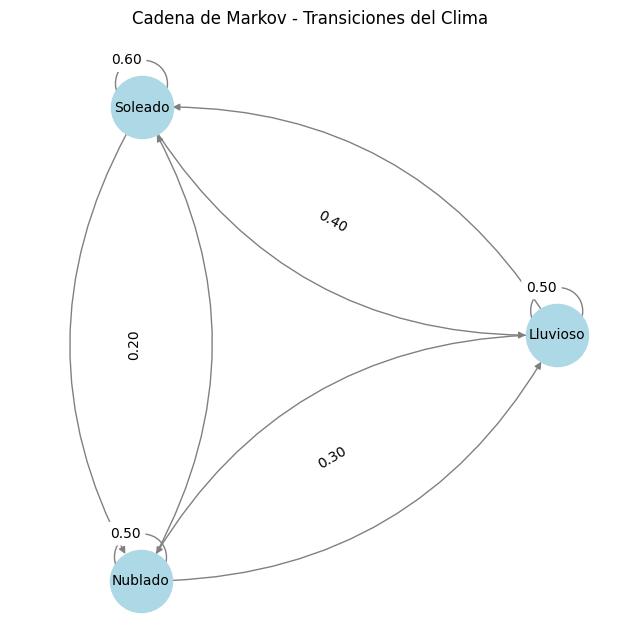

In [37]:
import networkx as nx



# Crear el grafo dirigido
G = nx.MultiDiGraph()
aristas = dict()
# Agregar nodos y aristas con pesos
for i in range(len(estados)):
    for j in range(len(estados)):
        peso = P[i, j]
        if peso > 0:
            #curvear grafos

            G.add_edge(estados[i], estados[j], weight=peso)
            aristas[(estados[i], estados[j])] = peso

# Dibujar el grafo
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # Posiciones de los nodos
edges = G.edges(data=True)

# Dibujar nodos y aristas
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    edge_color="gray",
    font_size=10,
    connectionstyle="arc3,rad=0.3",  # Curve parallel edges
)
# Agregar etiquetas con los pesos de transición
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, horizontalalignment="right")


# Mostrar el grafo
plt.title("Cadena de Markov - Transiciones del Clima")
plt.show()


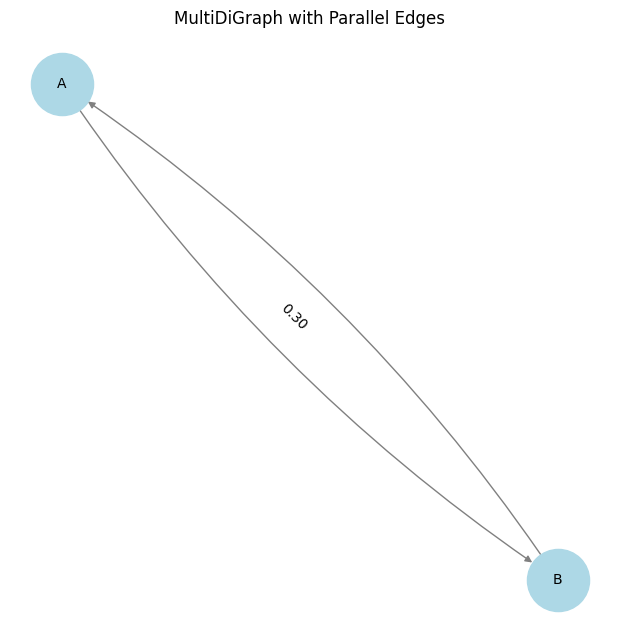

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'G' is your MultiDiGraph (or create a new one)
G = nx.MultiDiGraph()

# Adding parallel edges
G.add_edge("A", "B", weight=0.6)  # First edge
G.add_edge("B", "A", weight=0.3)  # Second edge (parallel)
# Add more edges as needed

# Drawing the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # Node positions
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=2000,
    edge_color="gray",
    font_size=10,
    connectionstyle="arc3,rad=0.1",  # Curve parallel edges
)

# Add edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=edge_labels,
    font_size=10,
    horizontalalignment="right",
    verticalalignment="bottom",
)

# Show the graph
plt.title("MultiDiGraph with Parallel Edges")
plt.show()